## Setup

In [35]:
import pandas as pd
import numpy as np
import config
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [53]:
from functions import load_taxonomy
X, y = load_taxonomy(boolean=True)
X_old, y_old = load_taxonomy(boolean=False)
display(X_old)
display(y)

s__Abiotrophia_defectiva  \
Study Accession Sample Accession or Sample ID                             
PRJDB3601       SAMD00036192                                        0.0   
                SAMD00036193                                        0.0   
                SAMD00036194                                        0.0   
                SAMD00036197                                        0.0   
                SAMD00036204                                        0.0   
...                                                                 ...   
N5              SRR5279310                                          0.0   
                SRR5279311                                          0.0   
                SRR5279312                                          0.0   
                SRR5279313                                          0.0   
V1              rhb_ram_0040                                        0.0   

                                               s__Acidaminococcus_fermentans  \
Study Accession Sample Accession or Sample ID                                  
PRJDB3601       SAMD00036192                                        0.000004   
                SAMD00036193                                        0.000000   
                SAMD00036194                                        0.000000   
                SAMD00036197                                        0.000000   
                SAMD00036204                                        0.000000   
...                                                                      ...   
N5              SRR5279310                                          0.000000   
                SRR5279311                                          0.000000   
                SRR5279312                                          0.000000   
                SRR5279313                                          0.000000   
V1              rhb_ram_0040                                        0.000000   

                                               s__Acidaminococcus_intestini  \
Study Accession Sample Accession or Sample ID                                 
PRJDB3601       SAMD00036192                                            0.0   
                SAMD00036193                                            0.0   
                SAMD00036194                                            0.0   
                SAMD00036197                                            0.0   
                SAMD00036204                                            0.0   
...                                                                     ...   
N5              SRR5279310                                              0.0   
                SRR5279311                                              0.0   
                SRR5279312                                              0.0   
                SRR5279313                                              0.0   
V1              rhb_ram_0040                                            0.0   

                                               s__Actinomyces_graevenitzii  \
Study Accession Sample Accession or Sample ID                                
PRJDB3601       SAMD00036192                                      0.003491   
                SAMD00036193                                      0.000110   
                SAMD00036194                                      0.000004   
                SAMD00036197                                      0.000435   
                SAMD00036204                                      0.001297   
...                                                                    ...   
N5              SRR5279310                                        0.000000   
                SRR5279311                                        0.000000   
                SRR5279312                                        0.000000   
                SRR5279313                                        0.000106   
V1              rhb_ram_0040                                      

Phenotype
Study Accession Sample Accession or Sample ID           
PRJDB3601       SAMD00036192                        True
                SAMD00036193                        True
                SAMD00036194                       False
                SAMD00036197                        True
                SAMD00036204                        True
...                                                  ...
N5              SRR5279310                         False
                SRR5279311                         False
                SRR5279312                         False
                SRR5279313                         False
V1              rhb_ram_0040                       False

[5026 rows x 1 columns]

In [41]:
from functions import get_groups
groups = get_groups(X)
groups

array([ 8,  8,  8, ...,  5,  5, 41])

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
import numpy as np

In [43]:
strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
logo = LeaveOneGroupOut()
loo = LeaveOneOut()

In [44]:
def p_h(estimator, X, y):
    y_hat = estimator.predict(X)
    healthies = y_hat[y]
    num_healthies = len(healthies)
    num_correct = healthies.sum()
    return num_correct / num_healthies

def p_n(estimator, X, y):
    y_hat = estimator.predict(X)
    unhealthies = y_hat[~y]
    num_unhealthies = len(unhealthies)
    num_correct = num_unhealthies - unhealthies.sum()
    return num_correct / num_unhealthies

def bal(estimator, X, y):
    y_hat = estimator.predict(X)
    return balanced_accuracy_score(y, y_hat)

In [57]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
X_old_scaled = pd.DataFrame(m.fit_transform(X_old), columns=X.columns, index=X.index)
X_old_scaled

s__Abiotrophia_defectiva  \
Study Accession Sample Accession or Sample ID                             
PRJDB3601       SAMD00036192                                        0.0   
                SAMD00036193                                        0.0   
                SAMD00036194                                        0.0   
                SAMD00036197                                        0.0   
                SAMD00036204                                        0.0   
...                                                                 ...   
N5              SRR5279310                                          0.0   
                SRR5279311                                          0.0   
                SRR5279312                                          0.0   
                SRR5279313                                          0.0   
V1              rhb_ram_0040                                        0.0   

                                               s__Acidaminococcus_fermentans  \
Study Accession Sample Accession or Sample ID                                  
PRJDB3601       SAMD00036192                                        0.000025   
                SAMD00036193                                        0.000000   
                SAMD00036194                                        0.000000   
                SAMD00036197                                        0.000000   
                SAMD00036204                                        0.000000   
...                                                                      ...   
N5              SRR5279310                                          0.000000   
                SRR5279311                                          0.000000   
                SRR5279312                                          0.000000   
                SRR5279313                                          0.000000   
V1              rhb_ram_0040                                        0.000000   

                                               s__Acidaminococcus_intestini  \
Study Accession Sample Accession or Sample ID                                 
PRJDB3601       SAMD00036192                                            0.0   
                SAMD00036193                                            0.0   
                SAMD00036194                                            0.0   
                SAMD00036197                                            0.0   
                SAMD00036204                                            0.0   
...                                                                     ...   
N5              SRR5279310                                              0.0   
                SRR5279311                                              0.0   
                SRR5279312                                              0.0   
                SRR5279313                                              0.0   
V1              rhb_ram_0040                                            0.0   

                                               s__Actinomyces_graevenitzii  \
Study Accession Sample Accession or Sample ID                                
PRJDB3601       SAMD00036192                                      0.173502   
                SAMD00036193                                      0.005468   
                SAMD00036194                                      0.000186   
                SAMD00036197                                      0.021631   
                SAMD00036204                                      0.064484   
...                                                                    ...   
N5              SRR5279310                                        0.000000   
                SRR5279311                                        0.000000   
                SRR5279312                                        0.000000   
                SRR5279313                                        0.005248   
V1              rhb_ram_0040                                      

In [72]:
for C in [30]:
    print("C parameter:", C)
    logreg = LogisticRegression(C=C, penalty='l1',
    fit_intercept=True, max_iter=10000, random_state=42, # l1_ratio=0.8,
                        solver='saga', n_jobs=-1, verbose=0)
    logreg.fit(X_old_scaled, y.values.ravel())
    y_hat = logreg.predict(X_old_scaled)
    print(balanced_accuracy_score(y, y_hat))

C parameter: 100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


convergence after 3795 epochs took 69 seconds
0.7524006374850409


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.2min finished


In [77]:
for C in [0.01]:
    print("C parameter:", C)
    logreg = LogisticRegression(C=C, penalty='l1',
    fit_intercept=True, max_iter=700, random_state=42, # l1_ratio=0.8,
                        solver='saga', n_jobs=-1, verbose=0)
    scores = cross_validate(logreg, X, y.values.ravel(), groups=groups, cv=logo, n_jobs=-1, verbose=10, 
                            scoring={
                                "p_h" : p_h,
                                "p_n" : p_n,
                                "bal" : bal
                            })
    print(np.mean(scores['test_bal']))

C parameter: 0.01


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  16 out of  42 | elapsed:    0.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  21 out of  42 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  26 out of  42 | elapsed:    1.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  31 out of  42 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  36 out of  42 | elapsed:    1.4s remaining:    0.2s


0.6243470832309669


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.5s finished


In [78]:
scores

{'fit_time': array([0.44245386, 0.4399848 , 0.34265399, 0.38495898, 0.43663025,
        0.38249707, 0.35155416, 0.39288306, 0.45153213, 0.40320206,
        0.31531692, 0.43207788, 0.43088484, 0.48049092, 0.48809409,
        0.48776555, 0.47685719, 0.57432389, 0.46823597, 0.47635412,
        0.48425889, 0.48483777, 0.44211197, 0.49668908, 0.47046614,
        0.44226098, 0.42241502, 0.49496603, 0.48943782, 0.50475883,
        0.47859883, 0.47121477, 0.46584487, 0.45026493, 0.37745309,
        0.42012119, 0.43834305, 0.41378164, 0.40673995, 0.36487007,
        0.36970019, 0.38290882]),
 'score_time': array([0.01016498, 0.02459502, 0.01027203, 0.02540088, 0.03123665,
        0.01873088, 0.02616787, 0.01019406, 0.01053905, 0.01224995,
        0.02676725, 0.01086712, 0.01047611, 0.00991631, 0.01043391,
        0.01024628, 0.00993586, 0.01041102, 0.01022315, 0.01008201,
        0.01187515, 0.01093006, 0.0104723 , 0.01020765, 0.01059103,
        0.01064706, 0.010427  , 0.01016927, 0.00886917, 

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_study_scores(y, scores):
    groupby = y.groupby(y.index.get_level_values(0))
    df = groupby.count()
    df.columns = ['count']
    df['num_healthy'] = groupby.sum()
    df['num_unhealthy'] = df['count'] - df['num_healthy']
    df['test_p_h'] = scores['test_p_h']
    df['test_p_n'] = scores['test_p_n']
    df['test_bal'] = scores['test_bal']
    df['group'] = list(range(42))
    
    sorted_healthy = df.sort_values('num_healthy').copy()
    sorted_healthy = sorted_healthy[sorted_healthy['num_healthy'] > 0]
    sorted_healthy = sorted_healthy.append(
        {"group" : "avg", "test_p_h" : sorted_healthy['test_p_h'].mean()}, ignore_index=True)
    
    sorted_unhealthy = df.sort_values('num_unhealthy').copy()
    sorted_unhealthy = sorted_unhealthy[sorted_unhealthy['num_unhealthy'] > 0]
    sorted_unhealthy = sorted_unhealthy.append(
        {"group" : "avg", "test_p_n" : sorted_unhealthy['test_p_n'].mean()}, ignore_index=True)
    
    sorted_all = df.sort_values('count').copy()
    sorted_all = sorted_all.append(
        {"group" : "avg", "test_bal" : sorted_all['test_bal'].mean()}, ignore_index=True)
    
    fig, ax = plt.subplots(figsize=(20, 15))
    
    sns.barplot(data=sorted_healthy, x='group', y='test_p_h', palette='crest')
    plt.xlabel("Group", fontsize=30)
    plt.ylabel("Accuracy", fontsize=30)
    plt.title("Healthy Groups", fontsize=45)
    plt.savefig(config.OUTPUT_DIR + "LOGOCV_healthy.png")
    
    fig, ax = plt.subplots(figsize=(20, 15))
    
    sns.barplot(data=sorted_unhealthy, x='group', y='test_p_n', palette='crest')
    plt.xlabel("Group", fontsize=30)
    plt.ylabel("Accuracy", fontsize=30)
    plt.title("Non-healthy Groups", fontsize=45)
    plt.savefig(config.OUTPUT_DIR + "LOGOCV_unhealthy.png")
    
    fig, ax = plt.subplots(figsize=(20, 15))
    sns.barplot(data=sorted_all, x='group', y='test_bal', palette='crest')
    plt.xlabel("Group", fontsize=30)
    plt.ylabel("Balanced Accuracy", fontsize=30)
    plt.title("All Groups", fontsize=45)
    plt.savefig(config.OUTPUT_DIR + "LOGOCV_all.png")
    
    

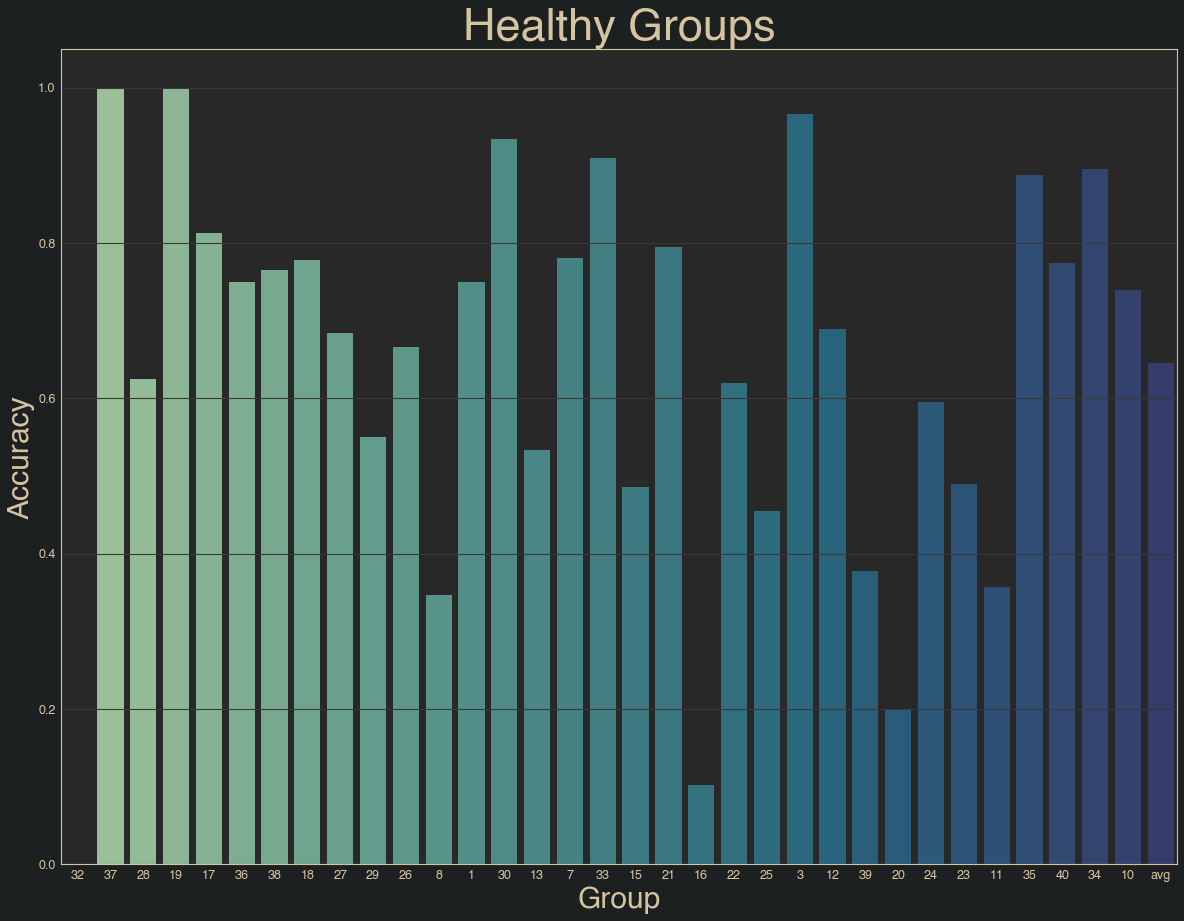

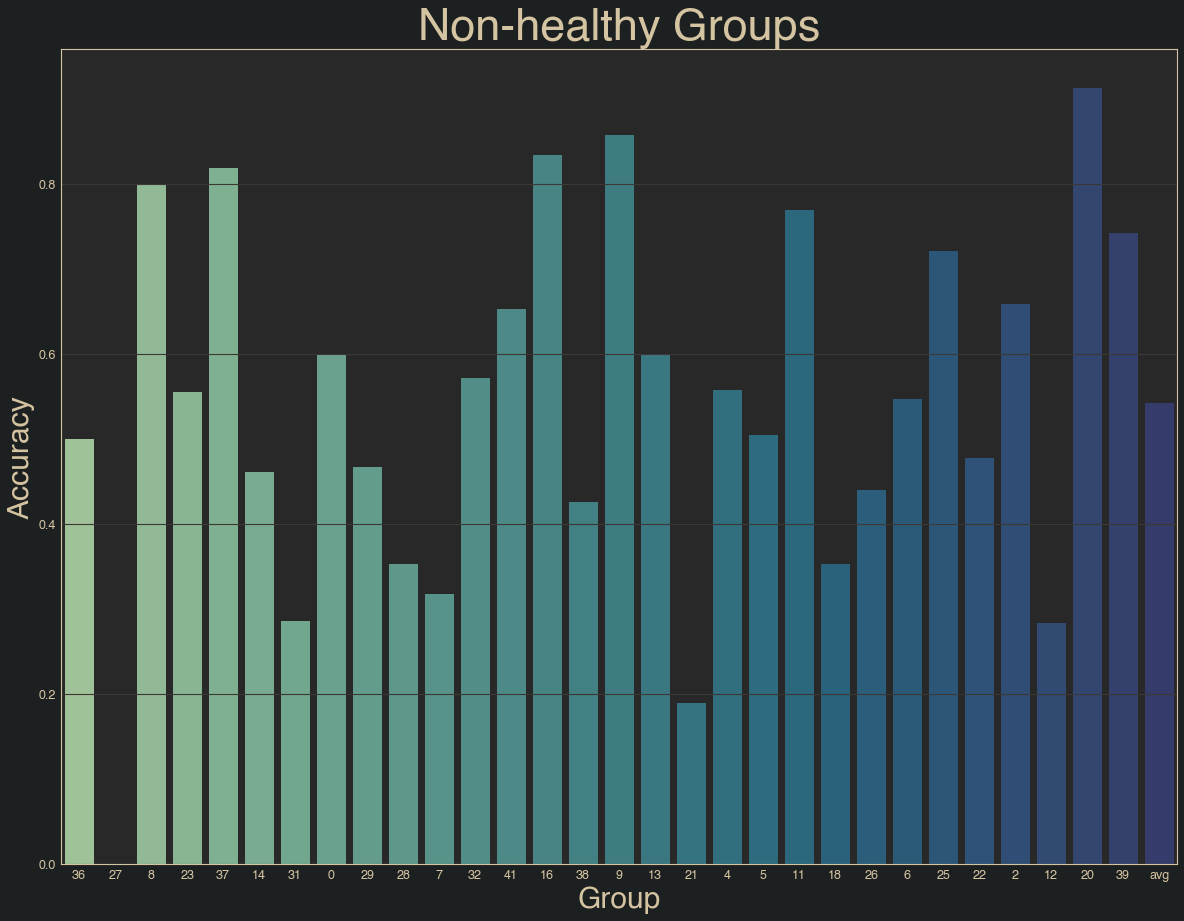

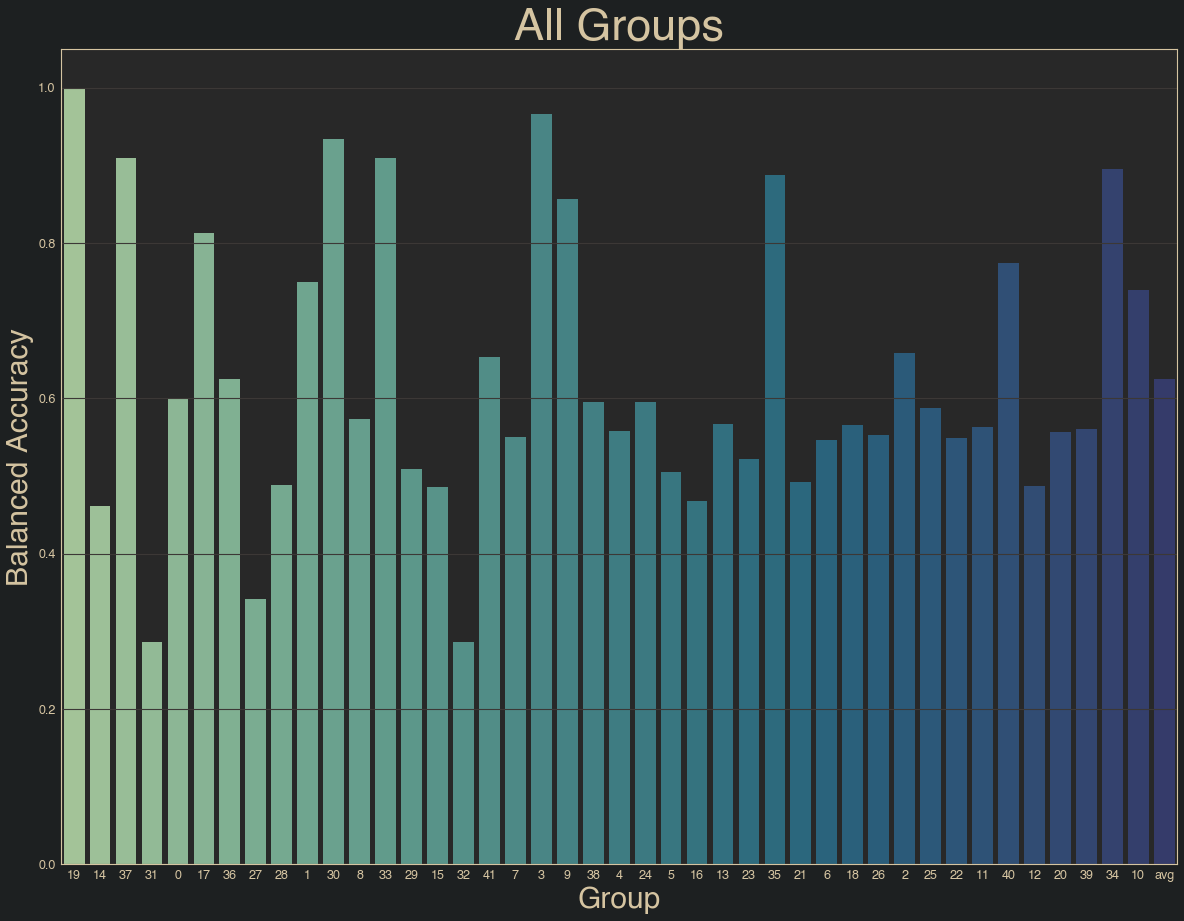

In [101]:
plot_study_scores(y, scores)

In [31]:
logreg.fit(X, y)

/Users/daniel/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


convergence after 149 epochs took 3 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.8s finished


LogisticRegression(C=1, max_iter=700, n_jobs=-1, penalty='l1', random_state=42,
                   solver='saga', verbose=10)

In [34]:
(logreg.coef_[0] != 0).sum()

286